In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import gaussian_kde
import contextily as ctx
import networkx as nx

C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
oa_london = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/OA_2011_London_gen_MHW.shp")
oa_london = oa_london.to_crs(epsg=27700)

ward_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Ward.shp")
ward_shp = ward_shp.to_crs(epsg=27700)

borough_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
borough_shp = borough_shp.to_crs(epsg=27700)

msoa_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")
msoa_shp = msoa_shp.to_crs(epsg=27700)

In [4]:
similarity_adjacency = pd.read_csv("output/similarity_index_adjancecy.csv")

In [6]:
similarity_adjacency.columns

Index(['Unnamed: 0', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD',
       'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS',
       'AVHHOLDSZ', 'geometry', 'similarity_index_des',
       'adjacent_ele_list_des', 'adjacent_2level_list_des',
       'similarity_index_des_weekday', 'adjacent_ele_list_des_weekday',
       'adjacent_2level_list_des_weekday', 'similarity_index_des_weekend',
       'adjacent_ele_list_des_weekend', 'adjacent_2level_list_des_weekend',
       'similarity_index_origin_weekday', 'adjacent_ele_list_origin_weekday',
       'adjacent_2level_list_origin_weekday',
       'similarity_index_origin_weekend', 'adjacent_ele_list_origin_weekend',
       'adjacent_2level_list_origin_weekend', 'similarity_index_origin',
       'adjacent_ele_list_origin', 'adjacent_2level_list_origin'],
      dtype='object')

In [8]:
similarity_adjacency = similarity_adjacency[['MSOA11CD',
                                                      'similarity_index_des','similarity_index_des_weekday','similarity_index_des_weekend',
                                                      'similarity_index_origin','similarity_index_origin_weekday','similarity_index_origin_weekend']]

In [10]:
# normalise the similarity index
similarity_adjacency["similarity_index_des"] = similarity_adjacency["similarity_index_des"]/similarity_adjacency["similarity_index_des"].max()
similarity_adjacency["similarity_index_des_weekday"] = similarity_adjacency["similarity_index_des_weekday"]/similarity_adjacency["similarity_index_des_weekday"].max()
similarity_adjacency["similarity_index_des_weekend"] = similarity_adjacency["similarity_index_des_weekend"]/similarity_adjacency["similarity_index_des_weekend"].max()
similarity_adjacency["similarity_index_origin"] = similarity_adjacency["similarity_index_origin"]/similarity_adjacency["similarity_index_origin"].max()
similarity_adjacency["similarity_index_origin_weekday"] = similarity_adjacency["similarity_index_origin_weekday"]/similarity_adjacency["similarity_index_origin_weekday"].max()
similarity_adjacency["similarity_index_origin_weekend"] = similarity_adjacency["similarity_index_origin_weekend"]/similarity_adjacency["similarity_index_origin_weekend"].max()

similarity_adjacency['dissimilarity_index_des'] = 1 - similarity_adjacency['similarity_index_des']
similarity_adjacency['dissimilarity_index_des_weekday'] = 1 - similarity_adjacency['similarity_index_des_weekday']
similarity_adjacency['dissimilarity_index_des_weekend'] = 1 - similarity_adjacency['similarity_index_des_weekend']
similarity_adjacency['dissimilarity_index_origin'] = 1 - similarity_adjacency['similarity_index_origin']
similarity_adjacency['dissimilarity_index_origin_weekday'] = 1 - similarity_adjacency['similarity_index_origin_weekday']
similarity_adjacency['dissimilarity_index_origin_weekend'] = 1 - similarity_adjacency['similarity_index_origin_weekend']

similarity_adjacency['dissimilarity_index_all'] = similarity_adjacency["dissimilarity_index_des"] + similarity_adjacency["dissimilarity_index_origin"]
similarity_adjacency['dissimilarity_index_all_weekday'] = similarity_adjacency["dissimilarity_index_des_weekday"] + similarity_adjacency["dissimilarity_index_origin_weekday"]
similarity_adjacency['dissimilarity_index_all_weekend'] = similarity_adjacency["dissimilarity_index_des_weekend"] + similarity_adjacency["dissimilarity_index_origin_weekend"]

similarity_adjacency

C:\Users\dune\AppData\Local\Temp\ipykernel_26636\3832042396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similarity_adjacency["similarity_index_des"] = similarity_adjacency["similarity_index_des"]/similarity_adjacency["similarity_index_des"].max()
C:\Users\dune\AppData\Local\Temp\ipykernel_26636\3832042396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similarity_adjacency["similarity_index_des_weekday"] = similarity_adjacency["similarity_index_des_weekday"]/similarity_adjacency["similarity_inde

,MSOA11CD,similarity_index_des,similarity_index_des_weekday,similarity_index_des_weekend,similarity_index_origin,similarity_index_origin_weekday,similarity_index_origin_weekend,dissimilarity_index_des,dissimilarity_index_des_weekday,dissimilarity_index_des_weekend,dissimilarity_index_origin,dissimilarity_index_origin_weekday,dissimilarity_index_origin_weekend,dissimilarity_index_all,dissimilarity_index_all_weekday,dissimilarity_index_all_weekend
0,E02000001,0.640412,0.636347,0.480613,0.653801,0.663709,0.398583,0.359588,0.363653,0.519387,0.346199,0.336291,0.601417,0.705786,0.699943,1.120803
1,E02000002,0.405955,0.397096,0.464793,0.425372,0.434915,0.372426,0.594045,0.602904,0.535207,0.574628,0.565085,0.627574,1.168674,1.167989,1.162782
2,E02000003,0.385733,0.364393,0.510029,0.504976,0.464966,0.452920,0.614267,0.635607,0.489971,0.495024,0.535034,0.547080,1.109291,1.170640,1.037051
3,E02000004,0.717429,0.635793,0.656774,0.582867,0.566341,0.433329,0.282571,0.364207,0.343226,0.417133,0.433659,0.566671,0.699704,0.797867,0.909897
4,E02000005,0.457276,0.475748,0.464317,0.660724,0.673870,0.460808,0.542724,0.524252,0.535683,0.339276,0.326130,0.539192,0.882001,0.850382,1.074875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,0.442278,0.487502,0.476645,0.531306,0.534441,0.462057,0.557722,0.512498,0.523355,0.468694,0.465559,0.537943,1.026415,0.978056,1.061297
979,E02006928,0.550316,0.509596,0.550579,0.385427,0.324163,0.413756,0.449684,0.490404,0.449421,0.614573,0.675837,0.586244,1.064257,1.166242,1.035665
980,E02006929,0.438250,0.400563,0.607648,0.499013,0.401659,0.510521,0.561750,0.599437,0.392352,0.500987,0.598341,0.489479,1.062737,1.197779,0.881832
981,E02006930,0.466683,0.517369,0.618610,0.501058,0.512909,0.571481,0.533317,0.482631,0.381390,0.498942,0.487091,0.428519,1.032259,0.969722,0.809910


In [11]:
# normalise the dissimilarity_index_all
similarity_adjacency["dissimilarity_index_all"] = similarity_adjacency["dissimilarity_index_all"]/similarity_adjacency["dissimilarity_index_all"].max()
similarity_adjacency["dissimilarity_index_all_weekday"] = similarity_adjacency["dissimilarity_index_all_weekday"]/similarity_adjacency["dissimilarity_index_all_weekday"].max()
similarity_adjacency["dissimilarity_index_all_weekend"] = similarity_adjacency["dissimilarity_index_all_weekend"]/similarity_adjacency["dissimilarity_index_all_weekend"].max()

similarity_adjacency

C:\Users\dune\AppData\Local\Temp\ipykernel_26636\1181027101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similarity_adjacency["dissimilarity_index_all"] = similarity_adjacency["dissimilarity_index_all"]/similarity_adjacency["dissimilarity_index_all"].max()
C:\Users\dune\AppData\Local\Temp\ipykernel_26636\1181027101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similarity_adjacency["dissimilarity_index_all_weekday"] = similarity_adjacency["dissimilarity_index_all_weekday"]/similarity_adjacency["

,MSOA11CD,similarity_index_des,similarity_index_des_weekday,similarity_index_des_weekend,similarity_index_origin,similarity_index_origin_weekday,similarity_index_origin_weekend,dissimilarity_index_des,dissimilarity_index_des_weekday,dissimilarity_index_des_weekend,dissimilarity_index_origin,dissimilarity_index_origin_weekday,dissimilarity_index_origin_weekend,dissimilarity_index_all,dissimilarity_index_all_weekday,dissimilarity_index_all_weekend
0,E02000001,0.640412,0.636347,0.480613,0.653801,0.663709,0.398583,0.359588,0.363653,0.519387,0.346199,0.336291,0.601417,0.534112,0.510348,0.821063
1,E02000002,0.405955,0.397096,0.464793,0.425372,0.434915,0.372426,0.594045,0.602904,0.535207,0.574628,0.565085,0.627574,0.884407,0.851612,0.851815
2,E02000003,0.385733,0.364393,0.510029,0.504976,0.464966,0.452920,0.614267,0.635607,0.489971,0.495024,0.535034,0.547080,0.839468,0.853546,0.759708
3,E02000004,0.717429,0.635793,0.656774,0.582867,0.566341,0.433329,0.282571,0.364207,0.343226,0.417133,0.433659,0.566671,0.529509,0.581746,0.666560
4,E02000005,0.457276,0.475748,0.464317,0.660724,0.673870,0.460808,0.542724,0.524252,0.535683,0.339276,0.326130,0.539192,0.667464,0.620037,0.787417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,0.442278,0.487502,0.476645,0.531306,0.534441,0.462057,0.557722,0.512498,0.523355,0.468694,0.465559,0.537943,0.776751,0.713127,0.777471
979,E02006928,0.550316,0.509596,0.550579,0.385427,0.324163,0.413756,0.449684,0.490404,0.449421,0.614573,0.675837,0.586244,0.805389,0.850338,0.758693
980,E02006929,0.438250,0.400563,0.607648,0.499013,0.401659,0.510521,0.561750,0.599437,0.392352,0.500987,0.598341,0.489479,0.804238,0.873333,0.646000
981,E02006930,0.466683,0.517369,0.618610,0.501058,0.512909,0.571481,0.533317,0.482631,0.381390,0.498942,0.487091,0.428519,0.781174,0.707050,0.593313


In [12]:
similarity_adjacency_shp = msoa_shp.merge(similarity_adjacency, left_on='MSOA11CD', right_on='MSOA11CD')

In [13]:
similarity_adjacency_shp.to_file("output/dissimilarity_index_adjacency.shp")

C:\Users\dune\AppData\Local\Temp\ipykernel_26636\3114529405.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  similarity_adjacency_shp.to_file("output/dissimilarity_index_adjacency.shp")


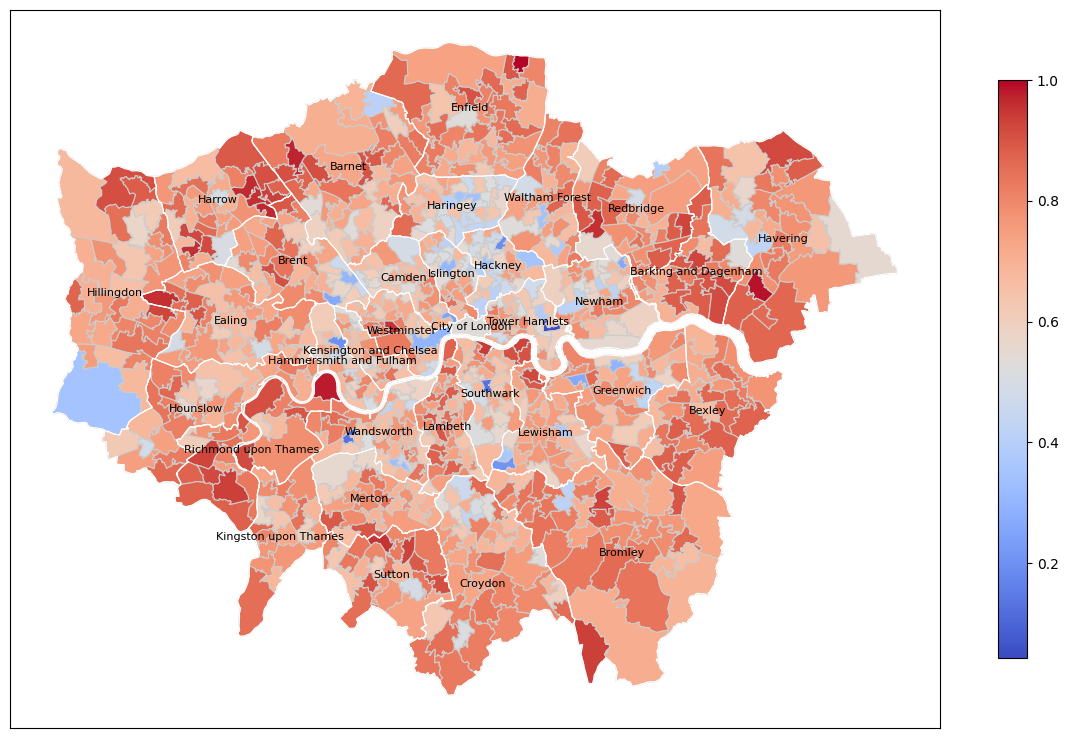

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
similarity_adjacency_shp.plot(column='dissimilarity_index_all', cmap='coolwarm',
                         linewidth=0.8, ax=ax, edgecolor='0.8',
                        legend=True, legend_kwds={'shrink': 0.5})
borough_shp.plot(ax=ax, edgecolor='white', linewidth=0.8, facecolor='none')
# label each borough with ;'NAME' columne
for x, y, label in zip(borough_shp.geometry.centroid.x, borough_shp.geometry.centroid.y, borough_shp['NAME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

plt.xticks([])
plt.yticks([])
plt.savefig("output/dissimilarity_index_adjacency.png", dpi=600, bbox_inches='tight')
plt.show()


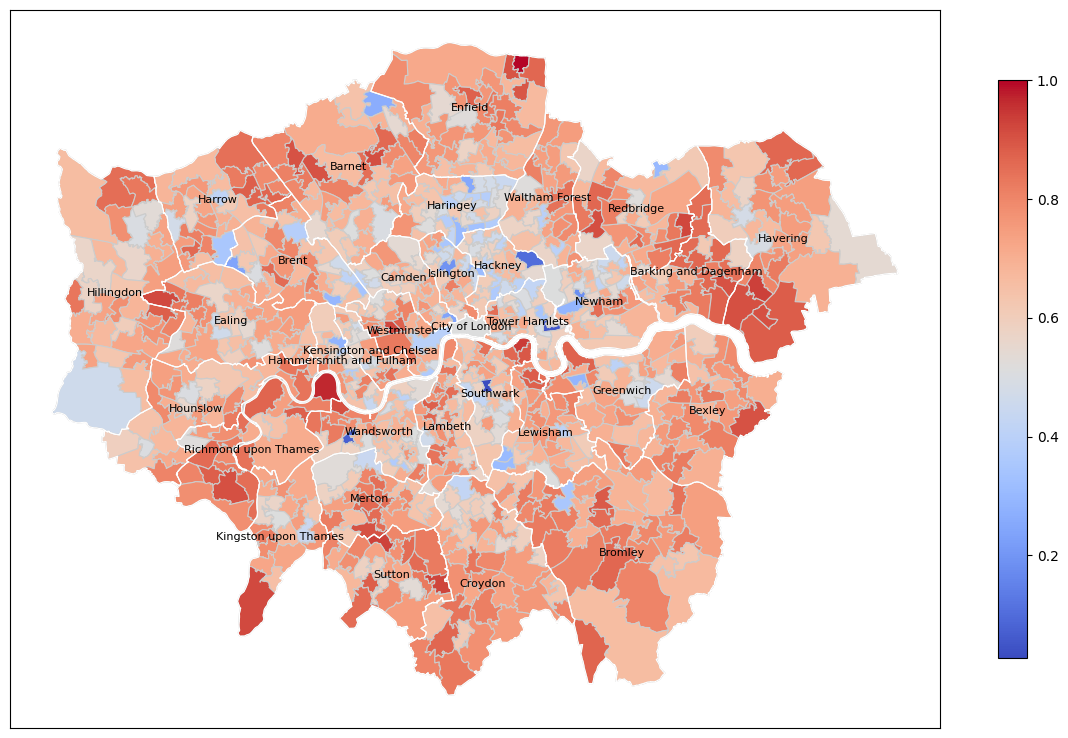

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
similarity_adjacency_shp.plot(column='dissimilarity_index_all_weekday', cmap='coolwarm',
                         linewidth=0.8, ax=ax, edgecolor='0.8',
                        legend=True, legend_kwds={'shrink': 0.5})
borough_shp.plot(ax=ax, edgecolor='white', linewidth=0.8, facecolor='none')
for x, y, label in zip(borough_shp.geometry.centroid.x, borough_shp.geometry.centroid.y, borough_shp['NAME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
plt.xticks([])
plt.yticks([])
plt.savefig("output/dissimilarity_index_adjacency_weekday.png", dpi=600, bbox_inches='tight')
plt.show()

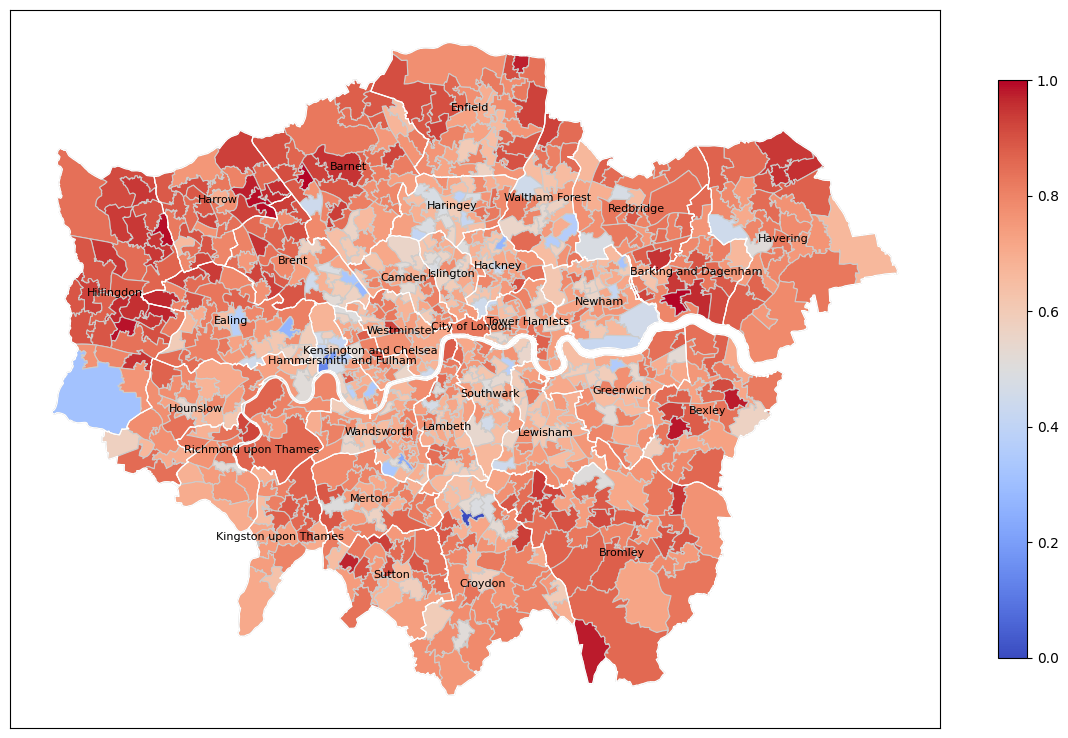

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
similarity_adjacency_shp.plot(column='dissimilarity_index_all_weekend', cmap='coolwarm',
                         linewidth=0.8, ax=ax, edgecolor='0.8',
                        legend=True, legend_kwds={'shrink': 0.5})
borough_shp.plot(ax=ax, edgecolor='white', linewidth=0.8, facecolor='none')
for x, y, label in zip(borough_shp.geometry.centroid.x, borough_shp.geometry.centroid.y, borough_shp['NAME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
plt.xticks([])
plt.yticks([])
plt.savefig("output/dissimilarity_index_adjacency_weekend.png", dpi=600, bbox_inches='tight')
plt.show()